<a href="https://colab.research.google.com/github/roguxivlo/machine-learning-24L/blob/main/hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Understanding Deconvolution in Autoencoders**
---------------

In class, we worked with autoencoders built from multilayer perceptrons (MLPs). However, encoders are often constructed using convolutional architectures to better capture spatial patterns. In this assignment, you'll explore how the decoder can use deconvolutional (transposed convolution) layers to reverse and mirror the operations performed by the convolutional encoder.

While convolutional encoders are relatively well understood, **decoding (or upsampling) the compressed representation** using **deconvolutional layers** (also known as **transposed convolutions**) often raises questions.

This assignment is particularly relevant because deconvolution is a core component of the U-Net architecture, a prominent neural network used extensively in image segmentation tasks.

Your main objective is to deeply understand **how transposed convolution layers work**, and explain them in both words and visuals.


## **The Objective**

Understand and clearly explain how **transposed convolutions** work. Use 2D transposed convolutions and a small grid of 2D points as a working example.

You may need to do some additional reading to complete this assignment.

## **Tasks & Deliverables**

### 1. **Theory Exploration**

Using markdown cells in your Colab notebook, answer the following:

- What is a **transposed convolution**?
- How does it differ from a regular convolution?
- How does it upsample feature maps?
- What are **stride**, **padding**, and **kernel size**, and how do they influence the result in a transposed convolution?
- To earn full two points, your explanation must be detailed enough for a reader to reproduce the upsampling process step by step.


### 2. **Manual Diagram (by your hand, not a generated image)**

Carefully plan and draw **by hand** a diagram or a set of diagrams that:

- Explain the process of using **transposed convolution**.
- Use an example of a **small input grid of 2D points** which gets expanded into a larger output grid.
- Explain how stride, padding, and the kernel shape affect the result.
- Show intermediate steps of the operation, not just input and output.

**Scan or photograph your diagram(s)**, and upload it to your **GitHub repository** for this course.

Then embed it in your Colab notebook using markdown (you can find examples on *how to do it* in previous notebooks related to this class, e.g. the one on linear regression or the one on the MLP network).


### 3. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.


# Theory explanation

## Transposed convolution

The goal of convolution is to downscale images, the goal of transposed convolution is in contrast to upscale them to the original size.

## Motivation behind the name "transposed convolution"

Let's start by examining a simple example of convolution layer:

\begin{align*}
    & H_{in} = W_{in} = 3\\
    & \text{Kernel } K\in \mathbb{R}^{2\times 2}\\
    & I = \begin{pmatrix}
            1 & 2 & 3\\
            1 & 1 & 1 \\
            2 & 3 & 4
            \end{pmatrix}, \quad
    K = \begin{pmatrix}
            2& 3 \\
            1 & 2 \\
            \end{pmatrix} \\
    &\text{Stride }S = 1, \text{ no padding}
\end{align*}
Then the result will be:
$ C =
\begin{pmatrix}
    11 & 16\\
    13 & 16
\end{pmatrix}
$
Notice, that we can express the convolution operation in the language of matrix multiplication.

Our goal is to express convolution layer as a matrix, and image as a vector. Let's flatten $I$ like so:
$$
I_{\text{flattened}} =
\begin{pmatrix}
    1\\ 2 \\ 3 \\ 1 \\ 1 \\ 1 \\ 2 \\ 3 \\ 4
\end{pmatrix}
$$

Now we just need to find the right matrix $K'$ such that the result of
$
K'\cdot I_\text{flattened}
$ will be our output $C_{\text{flattened}}$:
$$
C_{\text{flattened}} =
\begin{pmatrix}
    11 \\ 16 \\ 13 \\ 16
\end{pmatrix}
$$

The matrix $K'$ will be:
$$
K' =
\begin{pmatrix}
    2 & 3 & 0 & 1 & 2 & 0 & 0 & 0 & 0 \\
    0 & 2 & 3 & 0 & 1 & 2 & 0 & 0 & 0 \\
    0 & 0 & 0 & 2 & 3 & 0 & 1 & 2 & 0 \\
    0 & 0 & 0 & 0 & 2 & 3 & 0 & 1 & 2 \\
\end{pmatrix}
$$

Now, notice that the result of $K'^T \cdot C_\text{flattened}$ has the same dimensions as the input image (although the exact vector will be different from input). Hence the name transposed convolution. In practice, the transposed kernel weights are learnt, and different from the original kernel

## The parameters

In this section, we explore the meaning of transposed convolution parameters:

- Kernel size
- Stride
- Padding

### Kernel size

In convolution context, bigger kernel means that each output pixel will contain information from more input pixels. At the same time though, the size of output decreases as Kernel size grows (assuming no padding).

In transposed convolution on the other hand, the output size grows with the kernel size. Each input pixel will be projected by kernel to a bigger area, affecting more pixels of the output. So, the bigger the kernel, the bigger the upscaling factor.

#### Examples (assume stride=1, no padding):
Kernel size $2\times 2$, input size $5\times 5$, convolution result: $4\times 4$

Kernel size $3\times 3$, input size $5\times 5$, convolution result: $3\times 3$

Kernel size $2\times 2$, input size $4\times 4$, transposed convolution result: $5\times 5$

Kernel size $3\times 3$, input size $3\times 3$, transposed convolution result: $5\times 5$

### Stride

In the standard convolution process, the stride determines how fast the kernel moves *along the input image*.

In contrast to that, the stride in the transposed diffusion process determines how fast the kernel moves *along the output image*

Stride can be two dimensional, it specifies thee steps in both directions.

### Padding

Padding in transposed convolutions is also 'an inverse' of padding in convolution.

In convolutions, as padding we understand adding additional zeros to the input image, so that output can be the same size as input.

In contrast, in transposed convolution, padding specifies how much of the output to crop, so that the output and input sizes can be the same.

Of course, in both cases, padding amount can be customized and input size doesn't need to equal to the output size.

# Diagrams

I've prepared some visualizations of how transposed convolution works. They highlight the meaning of parameters described above. Each diagram has a short description of configuration of these parameters, and sometimes a short comment is attached.

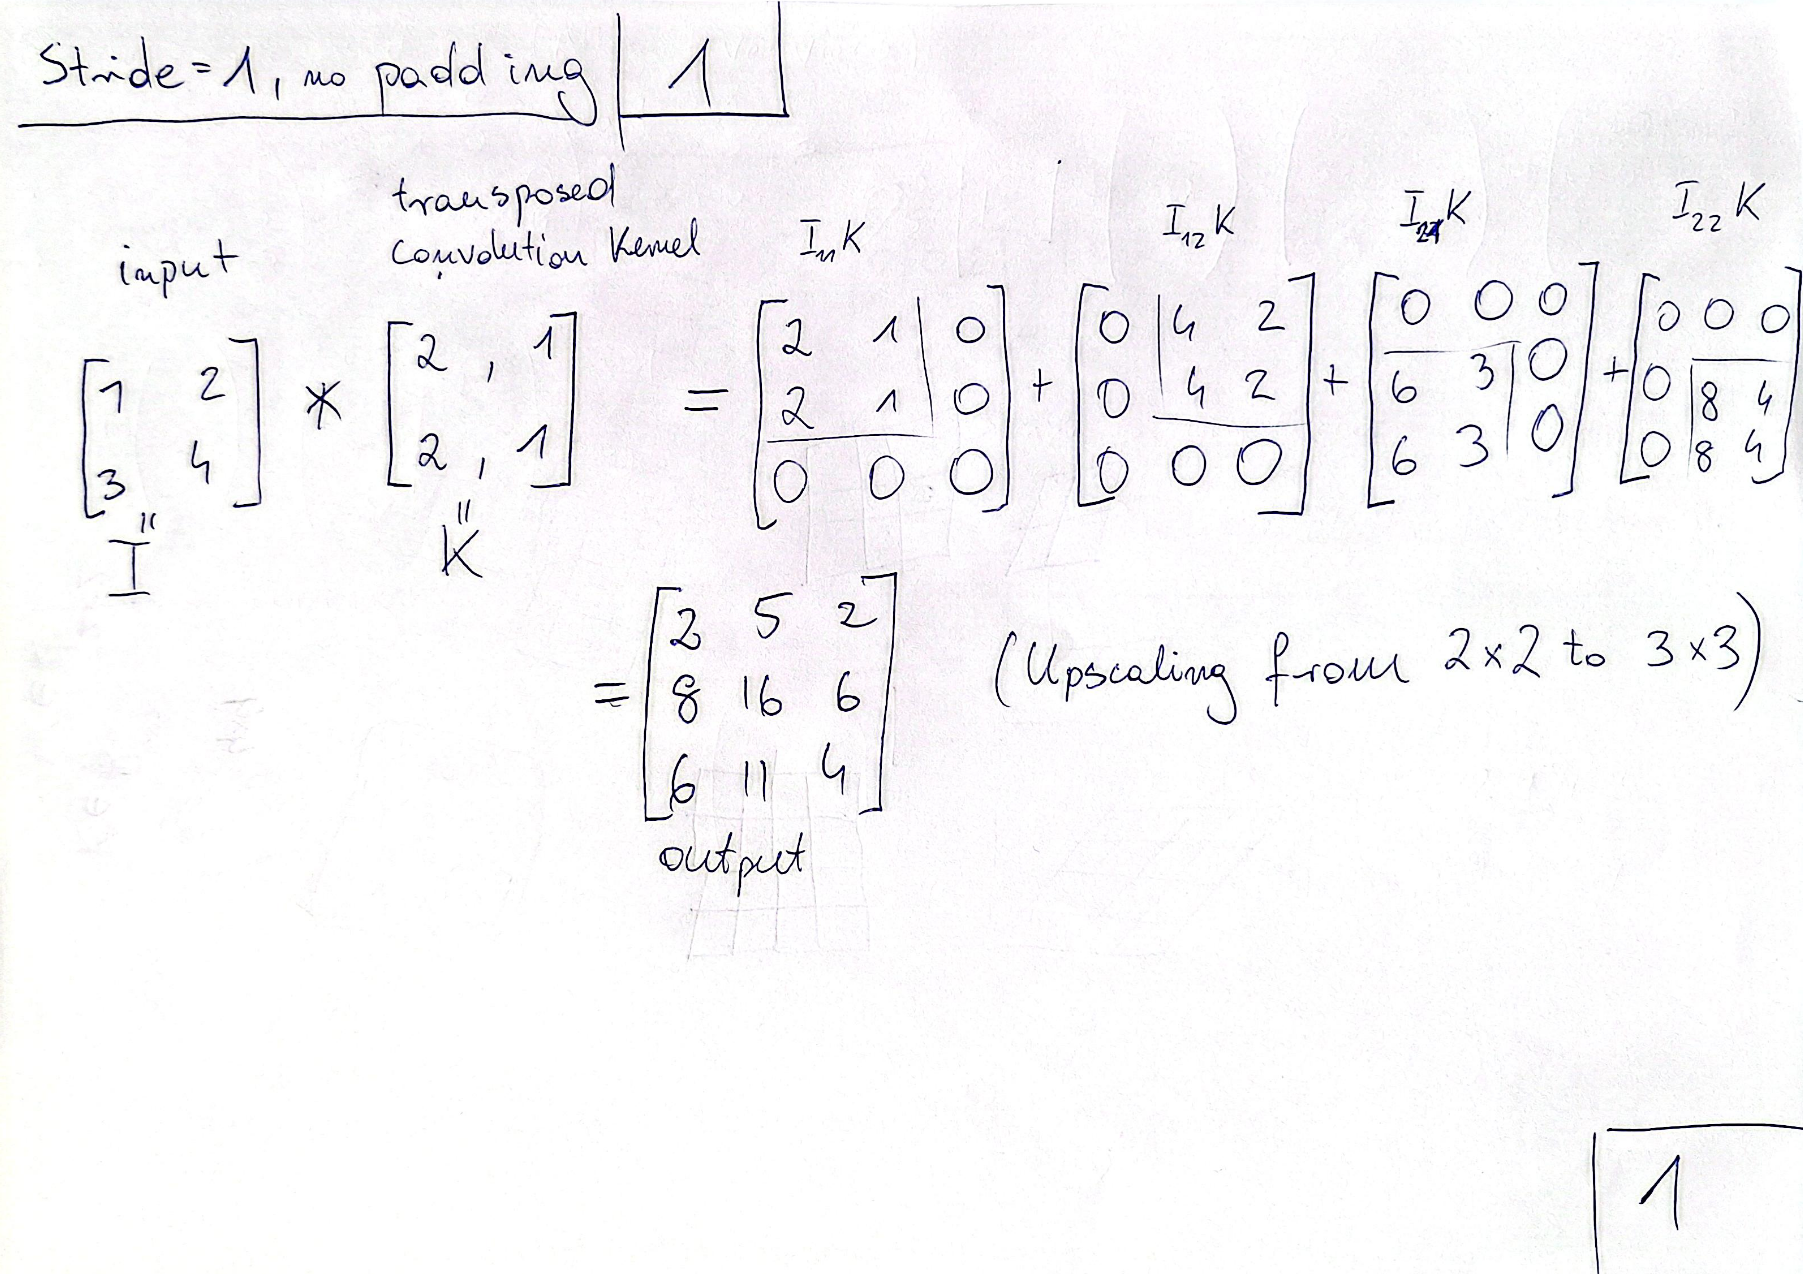